In [1]:
from keras.datasets import cifar10
from tensorflow import cast, float32
import matplotlib.pyplot as plt
import cifar10_models as c10m

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # load the data – already split

In [3]:
# normalize inputs
x_train = cast(x_train, float32) / 255.0
x_test = cast(x_test, float32) / 255.0

Metal device set to: Apple M1


2022-01-23 13:50:40.004812: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-23 13:50:40.005125: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
# get the models
models = [c10m.model_1(), c10m.model_2(), c10m.model_3()]

MODEL 1 TRAIN/VALIDATION DATA:

Epoch 1/4


2022-01-23 13:50:41.272329: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-23 13:50:41.558251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.2415 - accuracy: 0.5626

2022-01-23 13:51:34.542696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 56s 36ms/step - loss: 1.2415 - accuracy: 0.5626 - val_loss: 0.9524 - val_accuracy: 0.6698
Epoch 2/4
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7873 - accuracy: 0.7248 - val_loss: 0.7016 - val_accuracy: 0.7593
Epoch 3/4
1563/1563 [==============================] - 57s 36ms/step - loss: 0.6370 - accuracy: 0.7778 - val_loss: 0.6821 - val_accuracy: 0.7673
Epoch 4/4
1563/1563 [==============================] - 56s 36ms/step - loss: 0.5280 - accuracy: 0.8161 - val_loss: 0.5810 - val_accuracy: 0.8030


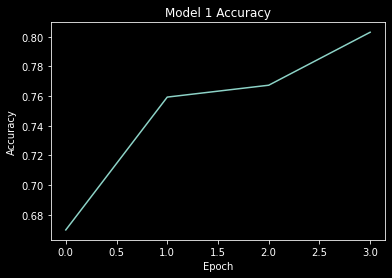

1/3 complete
MODEL 2 TRAIN/VALIDATION DATA:

Epoch 1/4


2022-01-23 13:54:25.901445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.2025 - accuracy: 0.5786

2022-01-23 13:55:14.975270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 52s 33ms/step - loss: 1.2025 - accuracy: 0.5786 - val_loss: 0.8833 - val_accuracy: 0.6909
Epoch 2/4
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7615 - accuracy: 0.7342 - val_loss: 0.8310 - val_accuracy: 0.7174
Epoch 3/4
1563/1563 [==============================] - 51s 33ms/step - loss: 0.6088 - accuracy: 0.7880 - val_loss: 0.6049 - val_accuracy: 0.7912
Epoch 4/4
1563/1563 [==============================] - 51s 32ms/step - loss: 0.4972 - accuracy: 0.8268 - val_loss: 0.5385 - val_accuracy: 0.8136


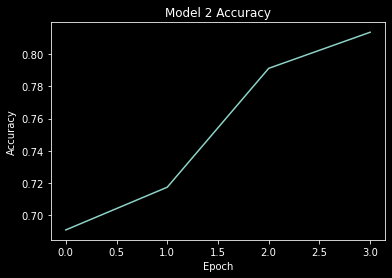

2/3 complete
MODEL 3 TRAIN/VALIDATION DATA:

Epoch 1/4


2022-01-23 13:57:52.173892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.2377 - accuracy: 0.5682

2022-01-23 13:58:50.546473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 62s 39ms/step - loss: 1.2377 - accuracy: 0.5682 - val_loss: 0.8902 - val_accuracy: 0.6862
Epoch 2/4
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7675 - accuracy: 0.7324 - val_loss: 0.7195 - val_accuracy: 0.7550
Epoch 3/4
1563/1563 [==============================] - 62s 40ms/step - loss: 0.5899 - accuracy: 0.7934 - val_loss: 0.7004 - val_accuracy: 0.7558
Epoch 4/4
1563/1563 [==============================] - 62s 40ms/step - loss: 0.4653 - accuracy: 0.8374 - val_loss: 0.5305 - val_accuracy: 0.8217


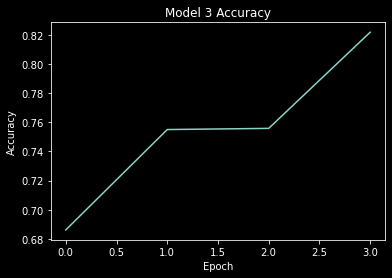

3/3 complete


In [5]:
i = 0 # track model number
for model in models:
    i+=1
    print('MODEL ' + str(i) + ' TRAIN/VALIDATION DATA:')
    print()  # one line space
    
    # train and test the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=4, batch_size=32)
    
    # plot accuracy (on validation set)
    plt.style.use('dark_background')
    plt.plot(history.history['val_accuracy'])
    plt.title('Model ' + str(i) + ' Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()
    
    print(str(i) + '/3 complete')